In [ ]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.2, shuffle=True)

In [ ]:
moons_df = pd.DataFrame({"x1": X[:, 0], "x2": X[:, 1], "y": y})

In [ ]:
moons_df

,x1,x2,y
0,0.459228,0.103902,1
1,1.952087,0.248510,1
2,0.474002,0.944193,0
3,1.769411,-0.272473,1
4,0.456400,0.809230,0
...,...,...,...
995,0.301862,0.168328,1
996,0.871634,-0.677553,1
997,0.240883,0.019678,1
998,1.663034,-0.253046,1


<Axes: xlabel='x1', ylabel='x2'>

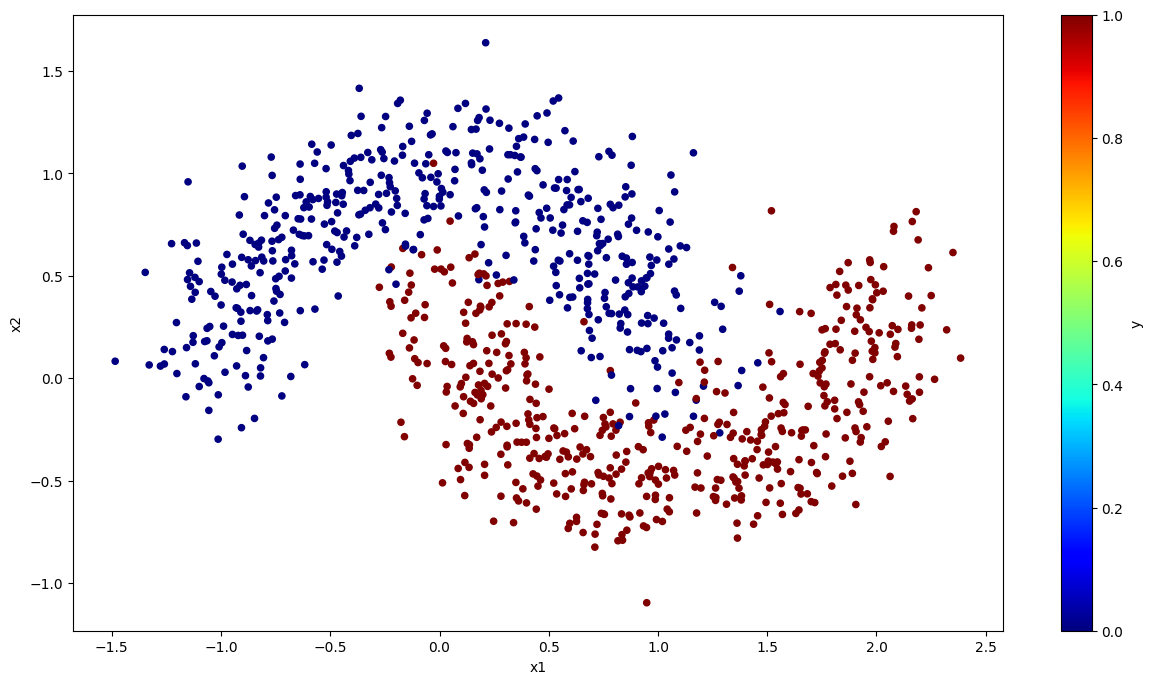

In [ ]:
moons_df.plot.scatter(x="x1", y="x2", c="y", cmap="jet", figsize=(15,8))

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=1)

Epoch 1/100
24/24 [==============================] - 5s 13ms/step - loss: 7.2782 - accuracy: 0.3853 - val_loss: 7.5990 - val_accuracy: 0.3960
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 7.2119 - accuracy: 0.4107 - val_loss: 7.5818 - val_accuracy: 0.4400
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 7.1378 - accuracy: 0.4373 - val_loss: 7.2193 - val_accuracy: 0.4760
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 6.4046 - accuracy: 0.4573 - val_loss: 5.8903 - val_accuracy: 0.4800
Epoch 5/100
24/24 [==============================] - 0s 5ms/step - loss: 4.8139 - accuracy: 0.4653 - val_loss: 4.2466 - val_accuracy: 0.4800
Epoch 6/100
24/24 [==============================] - 0s 7ms/step - loss: 3.8111 - accuracy: 0.4827 - val_loss: 3.0202 - val_accuracy: 0.4920
Epoch 7/100
24/24 [==============================] - 0s 6ms/step - loss: 2.6009 - accuracy: 0.4933 - val_loss: 1.7311 - val_accuracy: 0.4920
Epoch 8/100


In [ ]:
res_df = pd.DataFrame(history.history)

In [ ]:
res_df

,loss,accuracy,val_loss,val_accuracy
0,7.278209,0.385333,7.598988,0.396
1,7.211898,0.410667,7.581813,0.440
2,7.137797,0.437333,7.219292,0.476
3,6.404566,0.457333,5.890327,0.480
4,4.813930,0.465333,4.246603,0.480
...,...,...,...,...
95,0.243813,0.884000,0.214166,0.912
96,0.243409,0.885333,0.213121,0.912
97,0.242087,0.885333,0.212287,0.912
98,0.241135,0.884000,0.211423,0.912


<Axes: title={'center': 'Accuracy and validation accuracy'}>

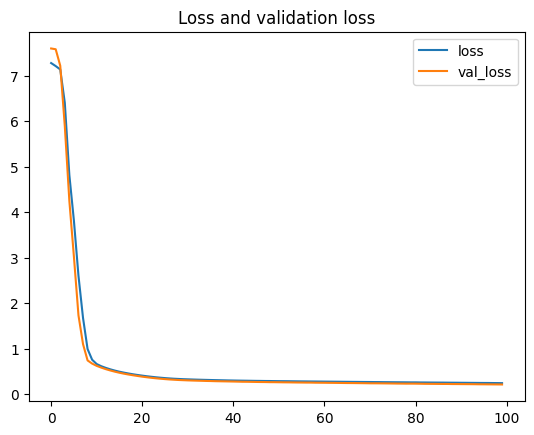

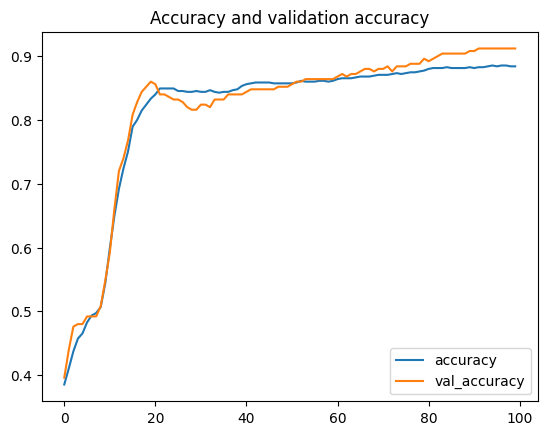

In [ ]:


res_df[['loss', 'val_loss']].plot(title='Loss and validation loss')
res_df[['accuracy', 'val_accuracy']].plot(title='Accuracy and validation accuracy')


In [ ]:
# prompt: evaluate the model on y_test

model.evaluate(X_test, y_test)


8/8 [==============================] - 0s 3ms/step - loss: 0.2104 - accuracy: 0.9120


[0.21041348576545715, 0.9120000004768372]

In [ ]:
# prompt: evaluate the model on train set

model.evaluate(X_train, y_train)


24/24 [==============================] - 0s 4ms/step - loss: 0.2391 - accuracy: 0.8867


[0.23908177018165588, 0.8866666555404663]

In [ ]:
# prompt: load fashion mnist dataset

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train.shape


4422102/4422102 [==============================] - 1s 0us/step


(60000, 28, 28)

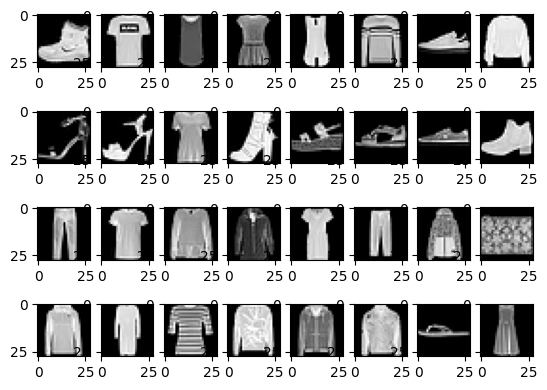

In [ ]:
# prompt: show all above X_train images

import matplotlib.pyplot as plt
for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(X_train[i], cmap='gray')
plt.show()


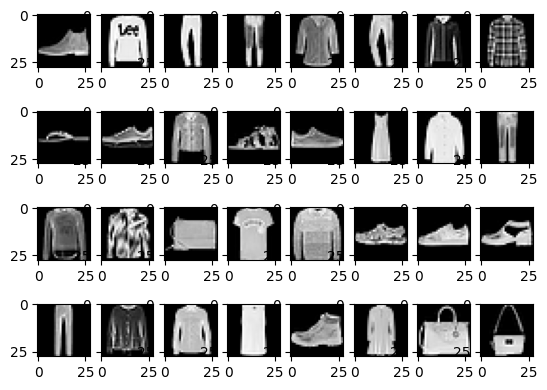

In [ ]:
# prompt: plot 32 image of y_test

for i in range(32):
    plt.subplot(4,8,i+1)
    plt.imshow(X_test[i], cmap='gray')
plt.show()
